In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import Sklearn KMeans clustering 
import seaborn as sns

In [70]:
data = pd.read_csv('./datasets/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
#data.isnull().sum()
data.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [73]:
#data.Gender.value_counts()
data.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

/tmp/ipykernel_4708/1006364413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, ax = ax1, palette=['turquoise', 'magenta'])


Text(0.5, 1.0, 'Female & Male Ratio')

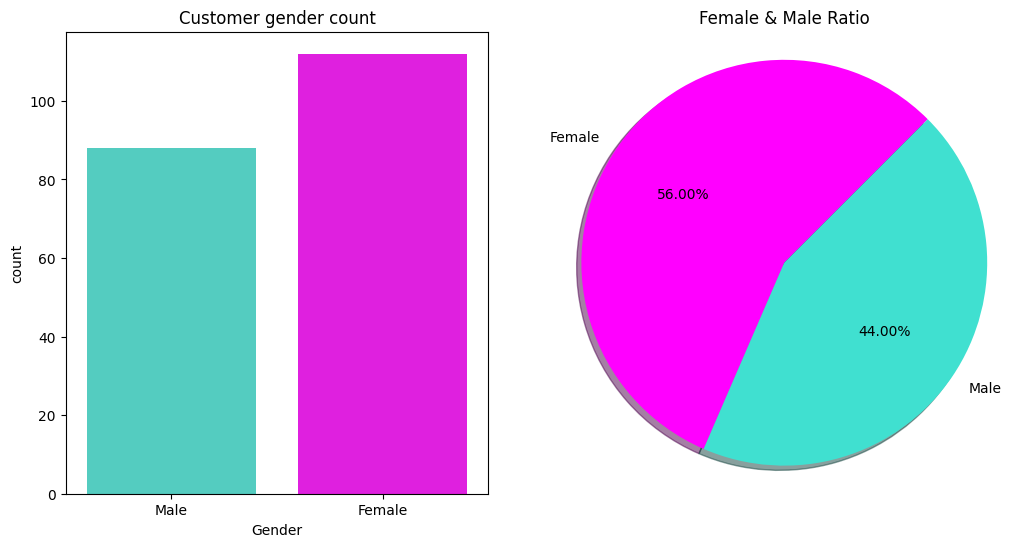

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

sns.countplot(x='Gender', data=data, ax = ax1, palette=['turquoise', 'magenta'])
ax1.set_title('Customer gender count')

totalGender = data.Gender.value_counts()

ax2.axis('equal')
ax2.pie(totalGender, labels=['Female', 'Male'], radius=1.2, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45, colors=['magenta', 'turquoise'])
ax2.set_title('Female & Male Ratio')

Text(0.5, 1.0, 'Histogram - Count by Age Range (8 Bins)')

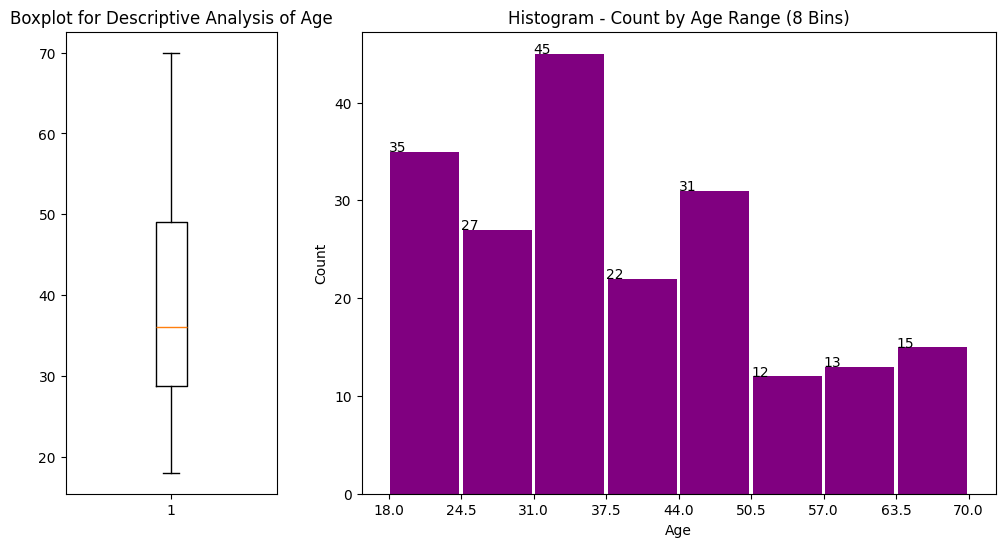

In [75]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 2, width_ratios=[1,3])

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.boxplot(data["Age"])
ax1.set_title('Boxplot for Descriptive Analysis of Age')

bins_8 = 8

x_offset = 0.2
y_offset = 0.2

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_8 + 1)

hist = plt.hist(data['Age'], bins = bins_aux, rwidth=0.95, color = 'purple')
for i in range(bins_8):
    ax2.text(hist[1][i],hist[0][i],int(hist[0][i]))
ax2.set_xticks(bins_aux)

ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Histogram - Count by Age Range (8 Bins)')

In [76]:
""" bins_8 = 8

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_8 + 1)
arr = plt.hist(data['Age'], bins = bins_aux, rwidth=0.95, color = 'purple') 
plt.xticks(bins_aux)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Count by Age Range (8 Bins)')
for i in range(bins_8):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i])) """

" bins_8 = 8\n\nage_column = data['Age']\n\nbins_aux = np.linspace(age_column.min(), age_column.max(), bins_8 + 1)\narr = plt.hist(data['Age'], bins = bins_aux, rwidth=0.95, color = 'purple') \nplt.xticks(bins_aux)\n\nplt.xlabel('Age')\nplt.ylabel('Count')\nplt.title('Histogram - Count by Age Range (8 Bins)')\nfor i in range(bins_8):\n    plt.text(arr[1][i],arr[0][i],str(arr[0][i])) "

In [77]:
age_column = data['Age']
mean_age = np.mean(age_column)
median_age = np.median(age_column)

print('Mean Age: ',mean_age)
print('Median Age:',median_age)

Mean Age:  38.85
Median Age: 36.0


If we use 8 bins we lose much detail and the distribution is flattened

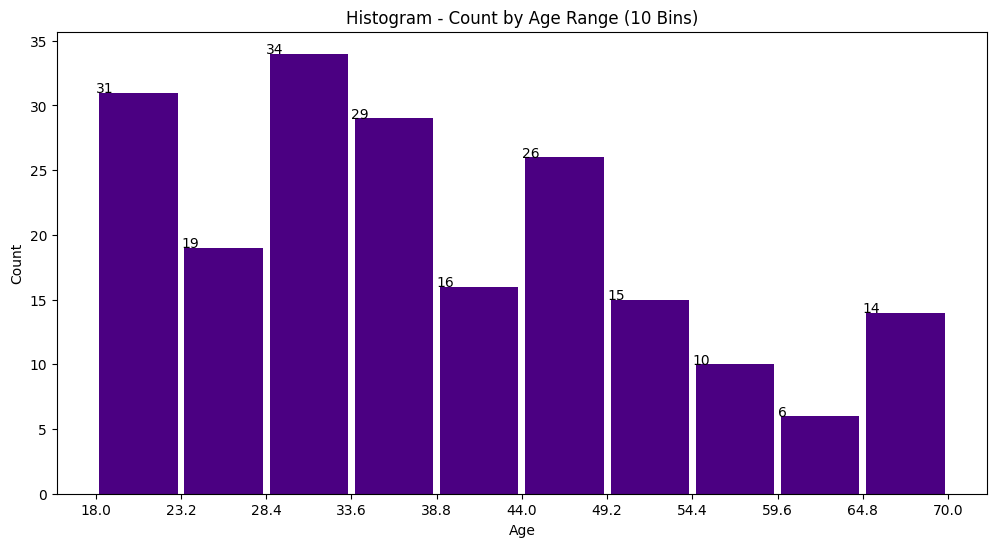

In [78]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

age_column = data['Age']

bins_aux = np.linspace(age_column.min(), age_column.max(), bins_10 + 1)
hist = plt.hist(age_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Count by Age Range (10 Bins)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

In [79]:
data['Annual Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income, dtype: float64

In [80]:
income_column = data['Annual Income']
mean_income = np.mean(income_column)
median_income = np.median(income_column)

print('Mean Income: ',mean_income)
print('Median Income:',median_income)

Mean Income:  60.56
Median Income: 61.5


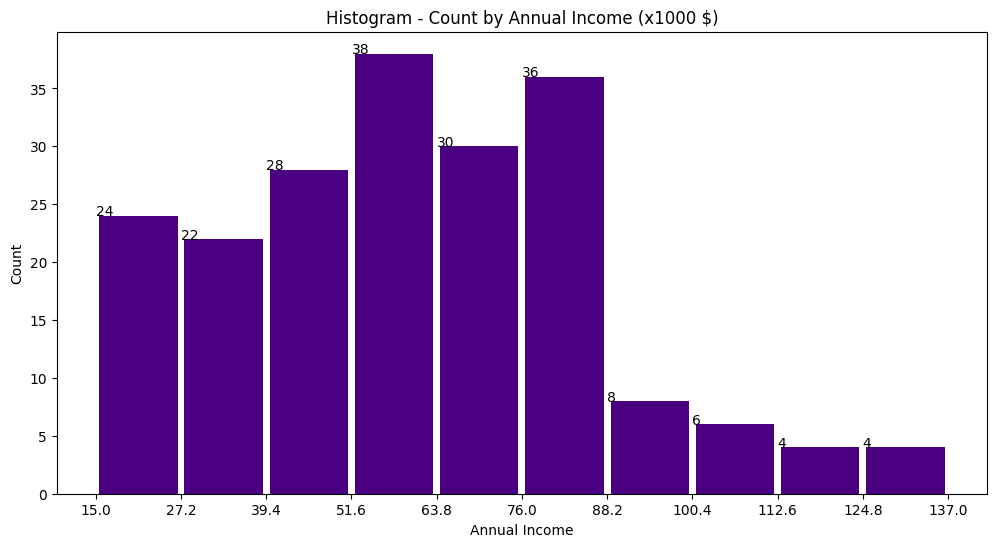

In [81]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

income_column = data['Annual Income']

bins_aux = np.linspace(income_column.min(), income_column.max(), bins_10 + 1)
hist = plt.hist(income_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Histogram - Count by Annual Income (x1000 $)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

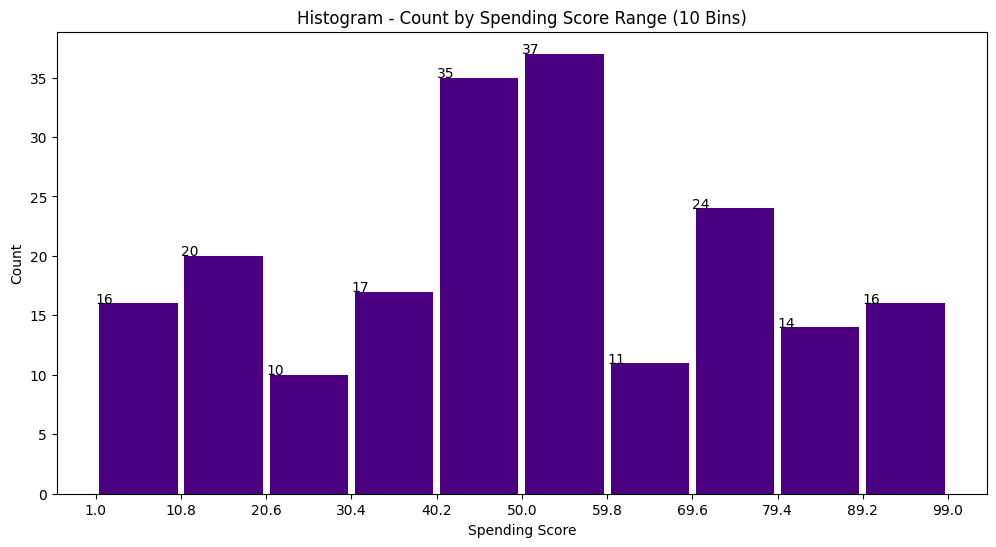

In [82]:
fig = plt.figure(figsize=(12, 6))

bins_10 = 10

spending_column = data['Spending Score']

bins_aux = np.linspace(spending_column.min(), spending_column.max(), bins_10 + 1)
hist = plt.hist(spending_column, bins = bins_aux, rwidth=0.92, color = 'indigo') 
plt.xticks(bins_aux)

plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.title('Histogram - Count by Spending Score Range (10 Bins)')
for i in range(bins_10):
    plt.text(hist[1][i],hist[0][i],int(hist[0][i]))

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [84]:
gender_mapping = {'Male': 0, 'Female': 1}
data['Gender'] = data['Gender'].replace(gender_mapping)

/tmp/ipykernel_4708/2629871752.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(gender_mapping)


In [115]:
data

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster_AI_KM3,cluster_AI_KM5,cluster_Age_KM4,cluster_Age_KM2
0,1,0,19,15,39,0,2,1,0
1,2,0,21,15,81,0,0,0,1
2,3,1,20,16,6,0,2,3,0
3,4,1,23,16,77,0,0,0,1
4,5,1,31,17,40,0,2,1,0
...,...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1,0,1
196,197,1,45,126,28,2,3,3,0
197,198,0,32,126,74,1,1,0,1
198,199,0,32,137,18,2,3,3,0


In [86]:
X = data[['Age', 'Annual Income', 'Gender']]
y = data['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 480.673141707248


In [119]:
X = data[['Age', 'Annual Income', 'Gender']]
y = data['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 483.29564616568894


In [87]:
income_spending = data[['Annual Income', 'Spending Score']]

# Calculate correlation coefficient matrix
correlation_matrix = income_spending.corr()

# Print the correlation matrix
print(correlation_matrix)

                Annual Income  Spending Score
Annual Income        1.000000        0.009903
Spending Score       0.009903        1.000000


In [88]:
km_3 = KMeans(n_clusters=3)
y_pred_AI_KM3 = km_3.fit_predict(data[['Annual Income', 'Spending Score']])
y_pred_AI_KM3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [89]:
data_pred = data
data_pred['cluster_AI_KM3'] = y_pred_AI_KM3
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster_AI_KM3
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,2
197,198,0,32,126,74,1
198,199,0,32,137,18,2


In [90]:
#check centroid
km_3.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

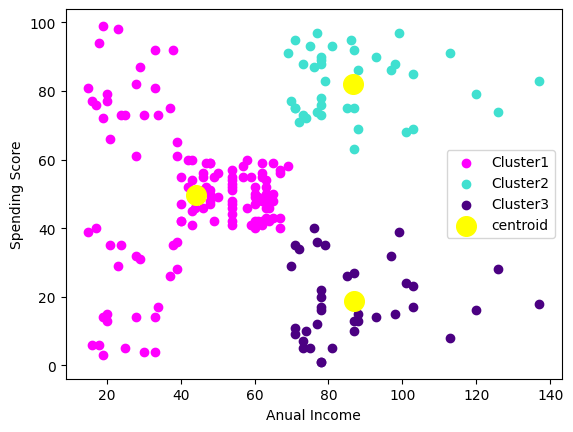

In [91]:
df0 = data_pred[data_pred.cluster_AI_KM3 == 0]
df1 = data_pred[data_pred.cluster_AI_KM3 == 1]
df2 = data_pred[data_pred.cluster_AI_KM3 == 2]
plt.scatter(df0['Annual Income'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Annual Income'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Annual Income'], df2['Spending Score'], color='indigo')
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'centroid'])

In [92]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income', 'Spending Score']])
    sse.append(km.inertia_)
sse

[269981.2800000001,
 185917.14253928524,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 32278.29345308779,
 28707.285166868012,
 27958.967833024817]

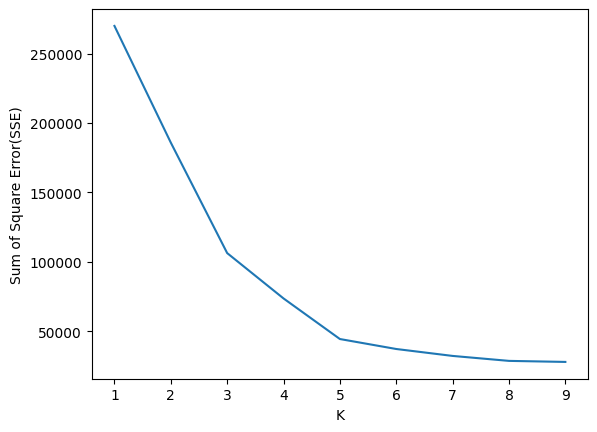

In [93]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_rng, sse)

In [94]:
km_5 = KMeans(n_clusters=5)
y_pred_KM5 = km_5.fit_predict(data[['Annual Income', 'Spending Score']])
y_pred_KM5

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [95]:
data_pred['cluster_AI_KM5'] = y_pred_KM5
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster_AI_KM3,cluster_AI_KM5
0,1,0,19,15,39,0,2
1,2,0,21,15,81,0,0
2,3,1,20,16,6,0,2
3,4,1,23,16,77,0,0
4,5,1,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1
196,197,1,45,126,28,2,3
197,198,0,32,126,74,1,1
198,199,0,32,137,18,2,3


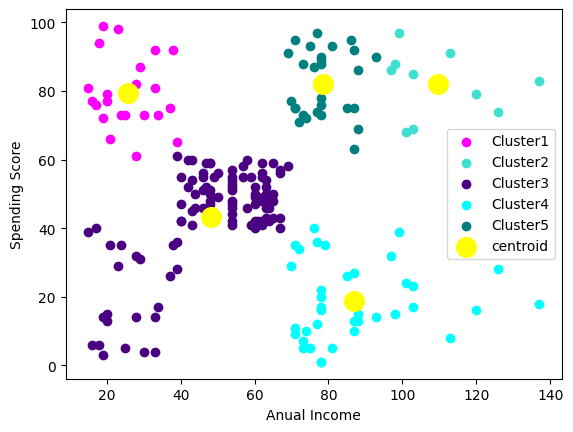

In [96]:
df0 = data_pred[data_pred.cluster_AI_KM5 == 0]
df1 = data_pred[data_pred.cluster_AI_KM5 == 1]
df2 = data_pred[data_pred.cluster_AI_KM5 == 2]
df3 = data_pred[data_pred.cluster_AI_KM5 == 3]
df4 = data_pred[data_pred.cluster_AI_KM5 == 4]
plt.scatter(df0['Annual Income'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Annual Income'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Annual Income'], df2['Spending Score'], color='indigo')
plt.scatter(df3['Annual Income'], df3['Spending Score'], color='cyan')
plt.scatter(df4['Annual Income'], df4['Spending Score'], color='teal')
plt.scatter(km_5.cluster_centers_[:,0], km_5.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5','centroid'])

In [97]:
income_spending = data[['Age', 'Spending Score']]

# Calculate correlation coefficient matrix
correlation_matrix = income_spending.corr()

# Print the correlation matrix
print(correlation_matrix)

                     Age  Spending Score
Age             1.000000       -0.327227
Spending Score -0.327227        1.000000


In [98]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age', 'Spending Score']])
    sse.append(km.inertia_)
sse

[171535.50000000003,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23907.659156946807,
 21049.901819061688,
 15611.907264869555,
 17276.800257476727,
 11861.991151679864]

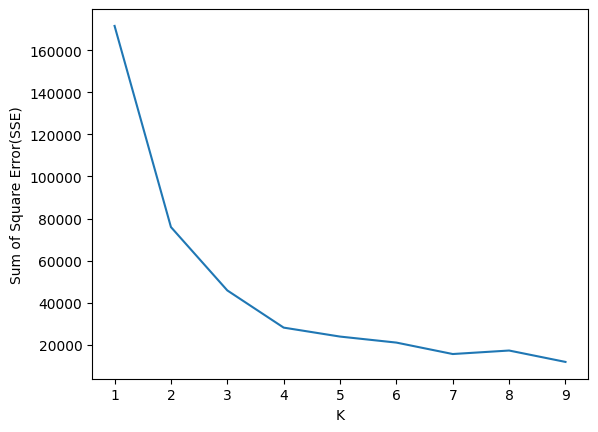

In [99]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_rng, sse)

In [100]:
km_4 = KMeans(n_clusters=4)
y_pred_KM4 = km_4.fit_predict(data[['Age', 'Spending Score']])
y_pred_KM4

array([1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 1,
       3, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [101]:
data_pred['cluster_Age_KM4'] = y_pred_KM4
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster_AI_KM3,cluster_AI_KM5,cluster_Age_KM4
0,1,0,19,15,39,0,2,1
1,2,0,21,15,81,0,0,0
2,3,1,20,16,6,0,2,3
3,4,1,23,16,77,0,0,0
4,5,1,31,17,40,0,2,1
...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1,0
196,197,1,45,126,28,2,3,3
197,198,0,32,126,74,1,1,0
198,199,0,32,137,18,2,3,3


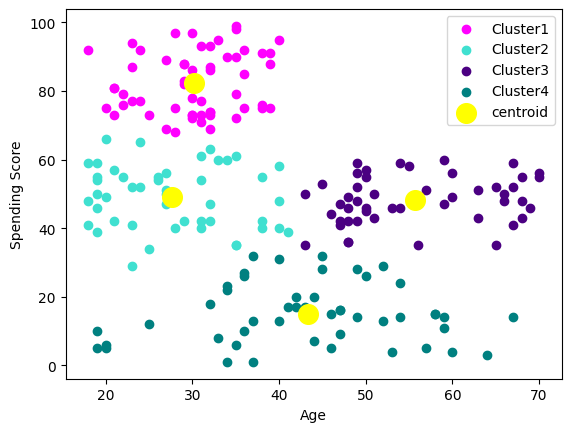

In [102]:
df0 = data_pred[data_pred.cluster_Age_KM4 == 0]
df1 = data_pred[data_pred.cluster_Age_KM4 == 1]
df2 = data_pred[data_pred.cluster_Age_KM4 == 2]
df3 = data_pred[data_pred.cluster_Age_KM4 == 3]
plt.scatter(df0['Age'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Age'], df1['Spending Score'], color='turquoise')
plt.scatter(df2['Age'], df2['Spending Score'], color='indigo')
plt.scatter(df3['Age'], df3['Spending Score'], color='teal')
plt.scatter(km_4.cluster_centers_[:,0], km_4.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','centroid'])

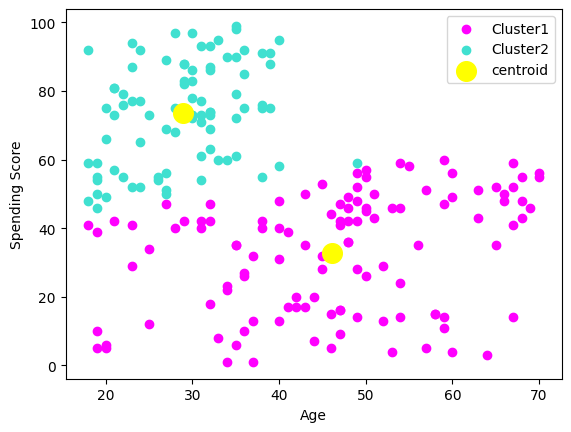

In [103]:
km_2 = KMeans(n_clusters=2)
y_pred_KM2 = km_2.fit_predict(data[['Age', 'Spending Score']])
data_pred['cluster_Age_KM2'] = y_pred_KM2
df0 = data_pred[data_pred.cluster_Age_KM2 == 0]
df1 = data_pred[data_pred.cluster_Age_KM2 == 1]
plt.scatter(df0['Age'], df0['Spending Score'], color='magenta')
plt.scatter(df1['Age'], df1['Spending Score'], color='turquoise')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'centroid'])

In [120]:
data_pred

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster_AI_KM3,cluster_AI_KM5,cluster_Age_KM4,cluster_Age_KM2
0,1,0,19,15,39,0,2,1,0
1,2,0,21,15,81,0,0,0,1
2,3,1,20,16,6,0,2,3,0
3,4,1,23,16,77,0,0,0,1
4,5,1,31,17,40,0,2,1,0
...,...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1,0,1
196,197,1,45,126,28,2,3,3,0
197,198,0,32,126,74,1,1,0,1
198,199,0,32,137,18,2,3,3,0


In [104]:
X = data_pred[['cluster_AI_KM5', 'cluster_Age_KM4', 'Gender']]
y = data_pred['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 134.79983739090875


In [121]:
X = data_pred[['cluster_AI_KM5', 'cluster_Age_KM4', 'Gender']]
y = data_pred['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 131.9806690846081


In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(data_pred.select_dtypes(include=[np.number]))

data_pred_normalized = pd.DataFrame(scaler.transform(data_pred.select_dtypes(include=[np.number])), 
                             columns=data_pred.select_dtypes(include=[np.number]).columns)

df = pd.concat([data_pred_normalized.select_dtypes(exclude=[np.number]), data_pred_normalized], axis=1)

print(df)

     CustomerID  Gender       Age  Annual Income  Spending Score  \
0      0.000000     0.0  0.019231       0.000000        0.387755   
1      0.005025     0.0  0.057692       0.000000        0.816327   
2      0.010050     1.0  0.038462       0.008197        0.051020   
3      0.015075     1.0  0.096154       0.008197        0.775510   
4      0.020101     1.0  0.250000       0.016393        0.397959   
..          ...     ...       ...            ...             ...   
195    0.979899     1.0  0.326923       0.860656        0.795918   
196    0.984925     1.0  0.519231       0.909836        0.275510   
197    0.989950     0.0  0.269231       0.909836        0.744898   
198    0.994975     0.0  0.269231       1.000000        0.173469   
199    1.000000     0.0  0.230769       1.000000        0.836735   

     cluster_AI_KM3  cluster_AI_KM5  cluster_Age_KM4  cluster_Age_KM2  
0               0.0            0.50         0.333333              0.0  
1               0.0            0.00    

In [107]:
X = df[['cluster_AI_KM5', 'cluster_Age_KM4', 'Gender']]
y = df['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014035801477603999


In [122]:
X = df[['cluster_AI_KM5', 'cluster_Age_KM4', 'Gender']]
y = df['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05781503800499791
